# Solvers test
This tests the suite of functions in `NAGC-solvers.jl`. This includes the bisection method (`bisect`), the secant method (`secant`), the Regula Falsi method (`regfalsi`), and the Newton and guarded Newton methods (`newton` and `gnewton`).

The interfaces have been 

The Jacobian matrix function `df(x)` must return an object `dfx` for which `dfx \ v` is defined for any `v::V`.

In [1]:
include("NAGC-solvers.jl")
using .NAGCSolvers

In [2]:
?bisect

search: bisect



x,nfe = bisect(f::Function,a::T,b::T,eps::T;     max_iter::Int=100, trace::Int=0, xlist::Union{Vector{T},Nothing}=nothing)

```
Uses bisection method on interval ``[a,b]`` (or ``[b,a]`` if ``a > b``) to
compute approximate solution `x` to `f(x) == 0`.
```

### Arguments

  * `f(x)` function
  * `a` 1st endpoint of interval
  * `b` 2nd endpoint of interval
  * `eps` target accuracy

### Optional named arguments

  * `max_iter` maximum number of iterations (default is 100)
  * `trace` trace execution of algorithm (default is 0 for no tracing)


In [3]:
f(x) = x*cos(x)-sin(x)
df(x) = -x*sin(x)

df (generic function with 1 method)

In [4]:
xlist_b = Float64[]
out_b = bisect(f,0.0,3*pi/2,1e-7,xlist=xlist_b)

(4.493409454437042, 27)

In [5]:
using Plots


(process:17396): GLib-GIO-WARNING **: 19:18:36.986: Unexpectedly, UWP app `KDEe.V.Okular_22.400.995.0_x64__7vt06qxq7ptv8' (AUMId `KDEe.V.Okular_7vt06qxq7ptv8!KDEe.V.Okular') supports 5 extensions but has no verbs


In [6]:
?secant

search: secant base_colorant_type



```
x,nfe = secant((func::Function,x1::T,x2::T,eps::T;
    max_iter::Int=100, trace::Int=0, xlist::Union{Vector{T},Nothing}=nothing) where {T}
```

Uses the secant method to solve     `func(x) = 0`  Approximate solution returned as `x`; `nfe` is the number of function evaluations.

### Arguments

  * `func` function to solve for
  * `x1` and `x2` are the initial guesses.

### Optional names arguments

  * `xlist` a history of the iterates if `xlist != nothing`
  * `max_iter` the maximum number of iterations (default is 100)
  * `trace` for tracing the operation of the algorithm (default is zero for no tracing)


In [7]:
xlist_s = Float64[]
out_b = secant(f,3.0,1.5*pi,1e-10,xlist=xlist_s)

(4.493409457909064, 8)

In [8]:
?regfalsi

search: regfalsi



```
x,nfe = regfalsi(f::Function,a::T,b::T,eps::T;
    max_iter::Int=100, trace::Int=0, xlist::Union{Vector{T},Nothing}=nothing)

Uses the Regula Falsi method on interval ``[a,b]`` (or ``[b,a]`` if ``a > b``) to
compute approximate solution `x` to `f(x) == 0`.
```

### Arguments

  * `f(x)` function
  * `a` 1st endpoint of interval
  * `b` 2nd endpoint of interval
  * `eps` target accuracy

### Optional named arguments

  * `max_iter` maximum number of iterations (default is 100)
  * `trace` trace execution of algorithm (default is 0 for no tracing)
  * `xlist` a history of the iterates if `xlist != nothing`


In [9]:
xlist_r = Float64[]
out_b = regfalsi(f,3.0,1.5*pi,1e-7,xlist=xlist_r)

(4.493409457909064, 14)

In [10]:
?fixedpt

search: fixedpt



```
fixedpt(g::Function,x::V,eps::T;
    max_iter::Int=100, trace::Int=0, xlist::Union{Vector{T},Nothing}=nothing) where {T}
```

Solves $g(x)=x$ via the iteration $x_{n+1}\gets g(x_n)$.

Returns iterate `x` and number of function evaluations `nfe`.

### Arguments

  * `f(x)` is the function value at `x`,
  * `x` (input) is the initial guess,
  * `eps > 0` is the error tolerance: the method stops when `||f(x)|| < eps`.

### Optional named arguments

  * `xlist` is the list of the iterates (if `xlist != nothing`)
  * `trace=1` to trace the execuation of the algorithm
  * `max_iter=m` to limit the algorithm to no more than `m` iterations (default is 10000)


In [11]:
xlist_f = Float64[]
out_f = fixedpt(x->pi+atan(x),1.5*pi,1e-10,xlist=xlist_f)

(4.493409457914199, 9)

In [12]:
?newton

search: newton gnewton



```
function newton(f::Function, df::Function, x::V, eps::Number; 
              trace=0::Int, itmax=10000::Int, xlist::Union{Vector{V},Nothing}=nothing)
```

Implements Newton's method for solving `f(x) == 0`.

### Arguments

  * `f(x)` is the function value at `x`,
  * `df(x)` is the Jacobian matrix of `f` at `x`,
  * `x` (input) is the initial guess,
  * `eps > 0` is the error tolerance: the method stops when `||f(x)|| < eps`.

### Optional named arguments

  * `xlist` is the list of the iterates (if `xlist != nothing`)
  * `trace=1` to trace the execuation of the algorithm
  * `itmax=m` to limit the algorithm to no more than `m` iterations (default is 10000)

    Returns solution, along with number of function and derivative (i.e., Jacobian) evaluations (`nfe`, `nde` resp.)

    Example: To solve $x-\cos(x) = 0$ with a tolerance of $10^{-10}$ and starting at $x=0$:   `x,nfe,nde = newton(x->x-cos(x),x->1+sin(x),0,1e-10)`


In [13]:
xlist_n = Float64[]
out = newton(f,df,3pi/2,1e-10,xlist=xlist_n)

(4.493409457931699, 4, 3)

In [14]:
xlist_n

3-element Vector{Float64}:
 4.500182389595496
 4.493419543039482
 4.493409457931699

In [15]:
f.(xlist_n)

3-element Vector{Float64}:
 0.02975136321189742
 4.423454245627845e-5
 9.928058375408e-11

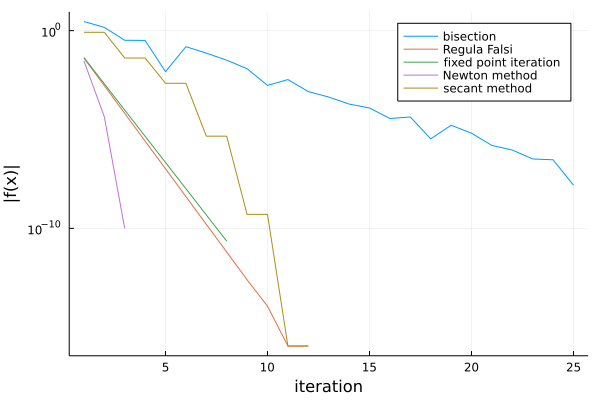

In [16]:
plot([1:length(xlist_b);],abs.(f.(xlist_b)),
    yaxis=:log,xlabel="iteration",ylabel="|f(x)|",label="bisection")
plot!([1:length(xlist_r);],abs.(f.(xlist_r)),label="Regula Falsi")
plot!([1:length(xlist_f);],abs.(f.(xlist_f)),label="fixed point iteration")
plot!([1:length(xlist_n);],abs.(f.(xlist_n)),label="Newton method")
plot!([1:length(xlist_s);],abs.(f.(xlist_s)),label="secant method")

In [17]:
using LinearAlgebra
f2(x) = [x[1]^3-x[1]*x[2]+exp(-x[1])*x[2]+2; x[2]^3-5*x[1]*x[2]^2+1]
df2(x) = [3x[1]^2-x[2]-exp(-x[1])*x[2] -x[1]+exp(-x[1]); -5*x[2]^2 3x[2]^2-10*x[1]*x[2]]
# check derivatives
x0 = [1.5; -2.4]; dx0 = 1e-7*[1.4; -3.2]
norm(f2(x0+dx0)-f2(x0-dx0)-2*df2(x0)*dx0)/norm(dx0)

2.0930381346194775e-8

In [18]:
xlist2=Vector{Float64}[]
out2 = newton(f2,df2,x0,1e-10,xlist=xlist2)

([-0.18793968709551276, -1.4292400695811214], 7, 6)

In [19]:
xlist2

6-element Vector{Vector{Float64}}:
 [0.7110494121512492, -1.7749582757140394]
 [0.06397863607007659, -1.5212560802921997]
 [-0.17920800591696065, -1.4648019409679822]
 [-0.18741405340701056, -1.4300882898554987]
 [-0.1879391273448318, -1.42924095583683]
 [-0.18793968709551276, -1.4292400695811214]

In [20]:
x2 = out2[1]
f2(x2)

2-element Vector{Float64}:
  6.479261571712414e-13
 -9.71978053598832e-12

In [21]:
norm.(f2.(xlist2))

6-element Vector{Float64}:
 16.03030551752325
  3.329068821502598
  0.22131782855944324
  0.00831403205696598
  8.787407106868203e-6
  9.741352163479364e-12

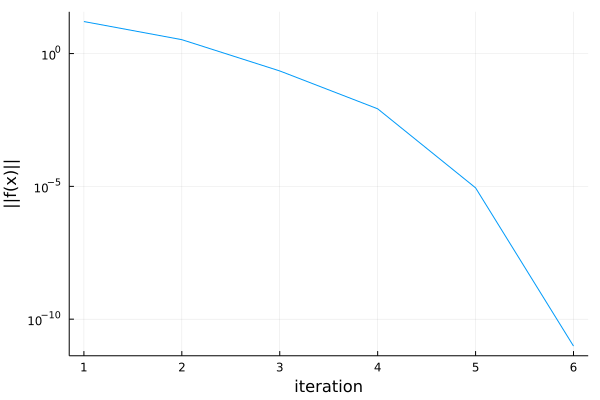

In [22]:
plot([1:length(xlist2);],norm.(f2.(xlist2)),yaxis=:log,xlabel="iteration",ylabel="||f(x)||",label=nothing)

In [23]:
f3(x) = [1-x[1]^2-x[2]^2; x[2]-exp(x[1])]
df3(x) = [-2x[1] -2x[2]; -exp(x[1]) 1]
norm(f3(x0+dx0)-f3(x0-dx0)-2*df3(x0)*dx0)/norm(dx0) # derivative check

4.051489844725743e-9

In [24]:
?gnewton

search: gnewton



```
function gnewton(f::Function, df::Function, x::V, eps::Number; trace=false::Bool, itmax=10000::Int)

	Implements guarded Newton method for solving `f(x) == 0`,
```

### Arguments

  * `f(x)` is the function value at `x`,
  * `df(x)` is the Jacobian matrix of `f` at `x`,
  * `x` (input) is the initial guess,
  * `eps > 0` is the error tolerance: the method stops when `||f(x)|| < eps`.

### Optional named arguments

  * `xlist` is the list of the iterates (if `xlist != nothing`)
  * `trace=1` to trace the execuation of the algorithm
  * `itmax=m` to limit the algorithm to no more than `m` iterations (default is 10000)

    Returns solution, along with number of function and derivative (i.e., Jacobian) evaluations (`nfe`, `nde` resp.)

    Example: To solve $x-\cos(x) = 0$ with a tolerance of $10^{-10}$ and starting at $x=0$:   `x,nfe,nde = gnewton(x->x-cos(x),x->1+sin(x),0,1e-10)`


In [25]:
x3,nfe3,nde3 = gnewton(f3,df3,x0,1e-10)

([-0.9165625831056982, 0.3998912742866619], 12, 9)

In [26]:
f3(x3)

2-element Vector{Float64}:
 -5.551115123125783e-17
  0.0

## Solving a nonlinear (Ricatti) matrix equation using Newton's method
We aim to solve the nonlinear equation
\begin{equation}
  F(X):=XCX+AX+XA^T+D=0
\end{equation}
for $(X+E)$, where $C,\,D$ are a square matrices (typically symmetric) of size $n\times n$, and $A$ is a n $n\times n$ matrix.

The linearization is given by
\begin{equation}
F(X+E)-F(X) = E(CX+A^T)+(XC+A)E +\mathcal{O}(||E||)^2.
\end{equation}
So the Newton equation for $E$ is actually a Sylvester equation: $ER+SE=G$, which can be solved using functions from `MatrixEquations`; specifically `sylvc`.

From the software point of view, we do not represent the Jacobian operator $E\mapsto ER+SE$ explicitly, but rather we have a new type `SylvesterOp` to represent this by storing the matrices $R$ and $S$. The solution operator `\` then involves a call to `sylvc`.

In [27]:
import MatrixEquations

struct SylvesterOp{T}
    R::Matrix{T}
    S::Matrix{T}
end

In [28]:
import Base.*, Base.\

function \(SO::SylvesterOp{T},rhs::Matrix{T}) where {T}
    return MatrixEquations.sylvc(SO.S,SO.R,rhs)
end

function *(SO::SylvesterOp{T},E::Matrix{T}) where {T}
    return E*SO.R+SO.S*E
end

* (generic function with 485 methods)

In [34]:
using Random
using LinearAlgebra
n = 5
C = randn(n,n)
C = (C+C')/2 + n*I
A = randn(n,n)
D = randn(n,n)
D = (D+D')/2 + n*I

5×5 Matrix{Float64}:
  4.9165    -0.968358  -0.40603   -0.706171  -0.613897
 -0.968358   4.67023    0.235113   1.1267    -0.831068
 -0.40603    0.235113   5.08491   -0.70599    0.183029
 -0.706171   1.1267    -0.70599    3.60432   -0.929767
 -0.613897  -0.831068   0.183029  -0.929767   4.69373

In [35]:
# check solve and multiply operators for SylversterOp
so = SylvesterOp(C+A',C+A)
X = randn(n,n)
Y = so * X
Z = so \ Y
print("||Z-X|| = ",norm(Z-X))

||Z-X|| = 4.1236300902000105e-15

In [36]:
F(X) = X*C*X+A*X+X*A'+D
dF(X) = SylvesterOp(C*X+A',X*C+A)
X0 = randn(n,n) # random initial guess
X,nfe,nde = gnewton(F,dF,X0,1e-7,trace=1,itmax=100)
println("X = ",X)
println("||F(X)|| = ", norm(F(X)))

gnewton: alpha = 1.0
newton: iter = 0, ||f(x)|| = 18.40331198554354
gnewton: alpha = 0.5
newton: iter = 1, ||f(x)|| = 10.86125282822409
gnewton: alpha = 0.001953125
newton: iter = 2, ||f(x)|| = 9.863981467016718
gnewton: alpha = 0.0625
newton: iter = 3, ||f(x)|| = 9.1733718100868
gnewton: alpha = 0.0625
newton: iter = 4, ||f(x)|| = 9.019620073286942
gnewton: alpha = 0.03125
newton: iter = 5, ||f(x)|| = 8.917478685792611
gnewton: alpha = 0.015625
newton: iter = 6, ||f(x)|| = 8.839202029344493
gnewton: alpha = 0.015625
newton: iter = 7, ||f(x)|| = 8.775997048026717
gnewton: alpha = 0.015625
newton: iter = 8, ||f(x)|| = 8.734959748188714
gnewton: alpha = 0.0078125
newton: iter = 9, ||f(x)|| = 8.698448786583473
gnewton: alpha = 0.0078125
newton: iter = 10, ||f(x)|| = 8.667883129476843
gnewton: alpha = 0.0078125
newton: iter = 11, ||f(x)|| = 8.645079215460521
gnewton: alpha = 0.0078125
newton: iter = 12, ||f(x)|| = 8.63272301167296
gnewton: alpha = 0.00390625
newton: iter = 13, ||f(x)|| = 8

In [32]:
nfe,nde

(1180, 101)

In [33]:
X

5×5 Matrix{Float64}:
  -52.5487  23.7366  4.2345   12.447    5.72912
  -81.4526  35.9197  7.05224  19.862    9.38991
  -50.0848  22.9548  3.19667  12.8018   5.50139
 -105.553   48.0916  9.1336   24.9184  11.6534
  -48.9084  22.0808  5.04827  10.8973   6.08678